In [1]:
import pandas as pan
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mbe, mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import train_test_split as tts, GridSearchCV

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
regredata = pan.read_csv('bps2 dataset.csv', encoding='latin-1')

In [5]:
regredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Code                                             350 non-null    object 
 1   Country or region                                350 non-null    object 
 2   Local authority                                  350 non-null    object 
 3   Number of meters (thousands): Domestic Standard  350 non-null    float64
 4   Number of meters (thousands): Domestic E7        350 non-null    float64
 5   Number of meters (thousands): All Domestic       350 non-null    float64
 6   Number of meters (thousands): All Non-Domestic   350 non-null    float64
 7   Number of meters (thousands): All meters         350 non-null    float64
 8   Total consumption (GWh): Domestic Standard       350 non-null    object 
 9   Total consumption (GWh): Domesti

In [7]:
regredata

,Code,Country or region,Local authority,Number of meters (thousands): Domestic Standard,Number of meters (thousands): Domestic E7,Number of meters (thousands): All Domestic,Number of meters (thousands): All Non-Domestic,Number of meters (thousands): All meters,Total consumption (GWh): Domestic Standard,Total consumption (GWh): Domestic E7,Total consumption (GWh): All Domestic,Total consumption (GWh): All Non-Domestic,Total consumption (GWh): All meters
0,E06000001,North East,Hartlepool,42.5,1.6,44.1,3.0,47.1,112.3,6.8,119.1,280.9,400
1,E06000002,North East,Middlesbrough,61.2,2.7,63.9,4.2,68.1,164.7,9.6,174.4,233.1,407.5
2,E06000003,North East,Redcar and Cleveland,62.9,2.7,65.6,3.8,69.4,163.5,11.2,174.7,557.4,732.2
3,E06000004,North East,Stockton-on-Tees,85.7,3.0,88.7,5.4,94.1,236.7,12.8,249.5,771.8,"1,021.40"
4,E06000005,North East,Darlington,49.6,2.7,52.3,3.7,56.0,136.1,12.8,148.9,256.4,405.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,S12000045,Scotland,East Dunbartonshire,45.8,2.9,48.8,2.4,51.2,140,12.7,152.7,142.6,295.3
346,S12000047,Scotland,Fife,172.6,12.3,184.9,12.4,197.3,476,53.7,529.7,813,"1,342.70"
347,S12000048,Scotland,Perth and Kinross,69.5,11.6,81.1,8.4,89.5,229.7,70.2,299.9,409.9,709.9
348,S12000049,Scotland,Glasgow City,277.3,44.9,322.2,23.2,345.4,665,158.9,823.9,"1,578.50","2,402.40"


In [9]:
regredata.isna().sum()

Code                                               0
Country or region                                  0
Local authority                                    0
Number of meters (thousands): Domestic Standard    0
Number of meters (thousands): Domestic E7          0
Number of meters (thousands): All Domestic         0
Number of meters (thousands): All Non-Domestic     0
Number of meters (thousands): All meters           0
Total consumption (GWh): Domestic Standard         0
Total consumption (GWh): Domestic E7               0
Total consumption (GWh): All Domestic              0
Total consumption (GWh): All Non-Domestic          0
Total consumption  (GWh): All meters               0
dtype: int64

In [11]:
obj2float = ['Total consumption (GWh): Domestic Standard',
               'Total consumption (GWh): All Domestic',
               'Total consumption (GWh): All Non-Domestic',
               'Total consumption  (GWh): All meters']

for obj in obj2float:
    regredata[obj] = regredata[obj].str.replace(',', '').astype(float)

In [13]:
regredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Code                                             350 non-null    object 
 1   Country or region                                350 non-null    object 
 2   Local authority                                  350 non-null    object 
 3   Number of meters (thousands): Domestic Standard  350 non-null    float64
 4   Number of meters (thousands): Domestic E7        350 non-null    float64
 5   Number of meters (thousands): All Domestic       350 non-null    float64
 6   Number of meters (thousands): All Non-Domestic   350 non-null    float64
 7   Number of meters (thousands): All meters         350 non-null    float64
 8   Total consumption (GWh): Domestic Standard       350 non-null    float64
 9   Total consumption (GWh): Domesti

In [15]:
regredata.columns

Index(['Code', 'Country or region', 'Local authority',
       'Number of meters (thousands): Domestic Standard',
       'Number of meters (thousands): Domestic E7',
       'Number of meters (thousands): All Domestic',
       'Number of meters (thousands): All Non-Domestic',
       'Number of meters (thousands): All meters',
       'Total consumption (GWh): Domestic Standard',
       'Total consumption (GWh): Domestic E7',
       'Total consumption (GWh): All Domestic',
       'Total consumption (GWh): All Non-Domestic',
       'Total consumption  (GWh): All meters'],
      dtype='object')

In [17]:
seen, unseen = tts(regredata,test_size=0.2,random_state=42)

In [19]:
dep = seen[['Number of meters (thousands): All Domestic',
       'Number of meters (thousands): All Non-Domestic',
       'Number of meters (thousands): All meters']]
indep = seen[['Total consumption  (GWh): All meters']]

In [21]:
len(dep), len(unseen)

(280, 70)

In [23]:
scaler = StandardScaler()
scaled_dat = scaler.fit_transform(dep)

In [25]:
deptrain, deptest, indeptrain, indeptest = tts(scaled_dat, indep, test_size=0.25, random_state=42)

In [27]:
len(deptest), len(deptrain)

(70, 210)

In [29]:
#Linear Regression

In [31]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(deptrain,indeptrain)

LinearRegression()

In [33]:
pred_lr = linear_reg.predict(deptest)

In [35]:
#SVR

In [37]:
parameters = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear']
}

In [39]:
svr = SVR()
grid_search_svr = GridSearchCV(estimator=svr, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [41]:
grid_search_svr.fit(deptrain, indeptrain)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [42]:
grid_search_svr.best_estimator_

SVR(C=10, epsilon=0.5, kernel='linear')

In [45]:
pred_svr = grid_search_svr.best_estimator_.predict(deptest)

In [47]:
#Linear Regression
print('MAE:', mbe(indeptest, pred_lr))
print('MSE:', mse(indeptest, pred_lr))
print('R2:', r2(indeptest, pred_lr))

MAE: 136.75559645645956
MSE: 51255.830877752436
R2: 0.7858649640290214


In [49]:
#SVR
print('MAE:', mbe(indeptest, pred_svr))
print('MSE:', mse(indeptest, pred_svr))
print('R2:', r2(indeptest, pred_svr))

MAE: 109.98688186613234
MSE: 43510.14265005357
R2: 0.8182246624058592


In [51]:
#Testing unseen data

In [53]:
depunseen = unseen[['Number of meters (thousands): All Domestic',
       'Number of meters (thousands): All Non-Domestic',
       'Number of meters (thousands): All meters']]
indepunseen = unseen[['Total consumption  (GWh): All meters']]

In [55]:
depunseen = scaler.transform(depunseen)
pred_svr_unseen = grid_search_svr.best_estimator_.predict(depunseen)

In [57]:
#SVR
print('MAE:', mbe(indepunseen, pred_svr_unseen))
print('MSE:', mse(indepunseen, pred_svr_unseen))
print('R2:', r2(indepunseen, pred_svr_unseen))

MAE: 120.82054902377337
MSE: 47946.99294035604
R2: 0.830099317313383


In [59]:
unseen['predicted consumption'] = pred_svr_unseen

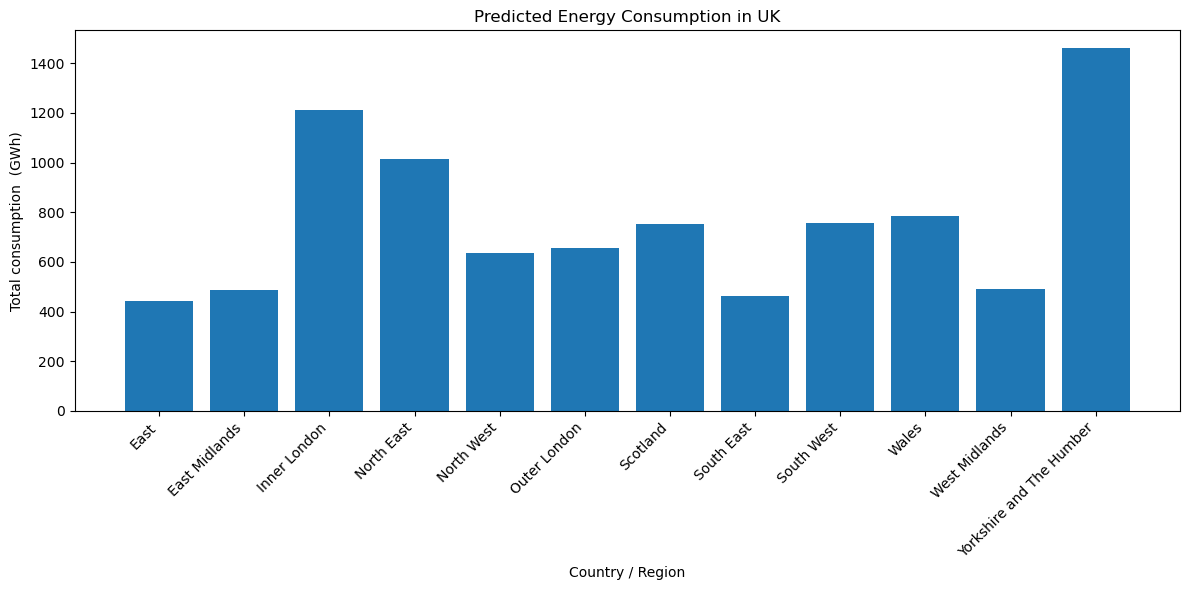

In [61]:
mean = unseen.groupby('Country or region')['predicted consumption'].mean()

plt.figure(figsize=(12, 6))
plt.bar(mean.index, mean.values)
plt.xlabel('Country / Region')
plt.ylabel('Total consumption  (GWh)')
plt.title('Predicted Energy Consumption in UK')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

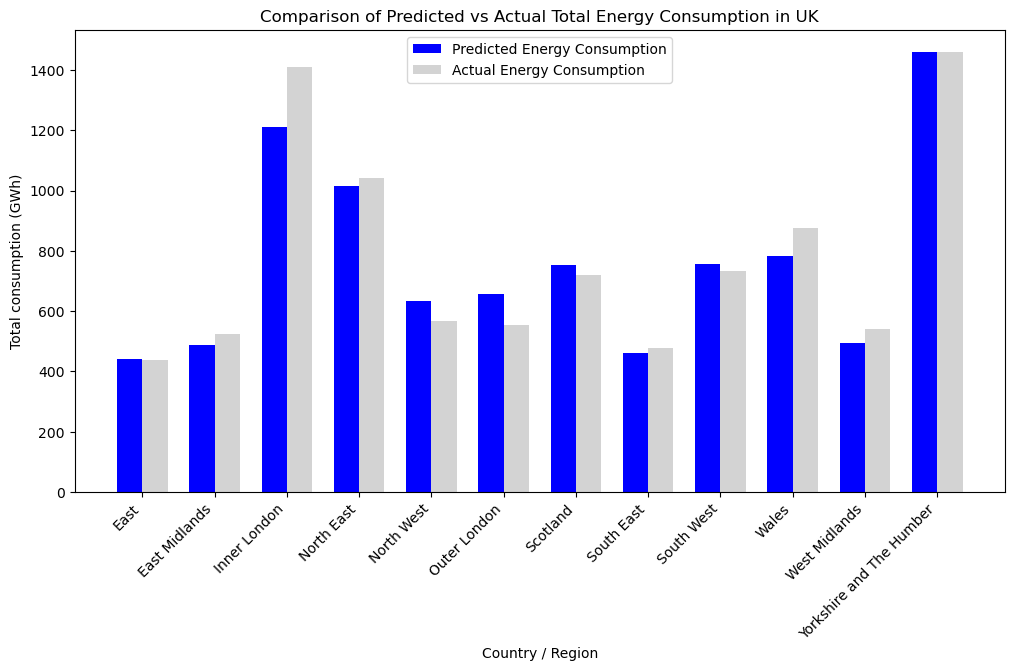

In [63]:
mean_predicted = unseen.groupby('Country or region')['predicted consumption'].mean()
mean_actual = unseen.groupby('Country or region')['Total consumption  (GWh): All meters'].mean()

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(mean_predicted))

plt.bar(index, mean_predicted, bar_width, label='Predicted Energy Consumption', color='blue')

plt.bar(index + bar_width, mean_actual, bar_width, label='Actual Energy Consumption', color='lightgrey')

plt.xlabel('Country / Region')
plt.ylabel('Total consumption (GWh)')
plt.title('Comparison of Predicted vs Actual Total Energy Consumption in UK')

plt.xticks(index + bar_width / 2, mean_predicted.index, rotation=45, ha='right')
plt.legend()
plt.show()